Data Visualization using Titanic Dataset

Data Visualization - Titanic Disaster

Problem Statement : Perform Data Visualizations using different explorations from the Titanic Dataset and gather better insights that would bring concluding statements and clear picture of Titanic Disaster with exclusive points that need to be noted/informed.

Dataset : https://drive.google.com/drive/folders/1-Zode8MLdjQJvFeYgj1SD7JDNPWfhoJE?usp=share_link

Things to Do :

1.	Explore and Sort the Data to make it visualization ready
2.	Compare the Parameters using Histogram and Pie Charts - Technical Topic 1
3.	Compare the Parameters using Bar Charts and Violin Plots - Technical Topic 2
4.	Compare the Parameters using Scatter Plots and Box Plots - Technical Topic 3
5.	Generate the Heatmap, Correlation Matrix and precisely mention the findings about the dataset



In [2]:
# importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import style
style.use("ggplot")

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
#	Read the dataset into a pandas dataframe

gender_submission = pd.read_csv("/content/gender_submission.csv")
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [5]:
#exploring train data .csv
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Describe data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.columns  #columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.dtypes #Data type of each column

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The columns 'Age' and 'Cabin' contains more null values. Insights 'Survived' is the target column/variable. 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data. 'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques. As there are a lot of missing values in the column 'Cabin', we can remove it from the training data. 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values. We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'

Visualization of 'Survived' (Target column) As we know, majority of passengers couldn't survive. Data is imbalanced.

<Axes: >

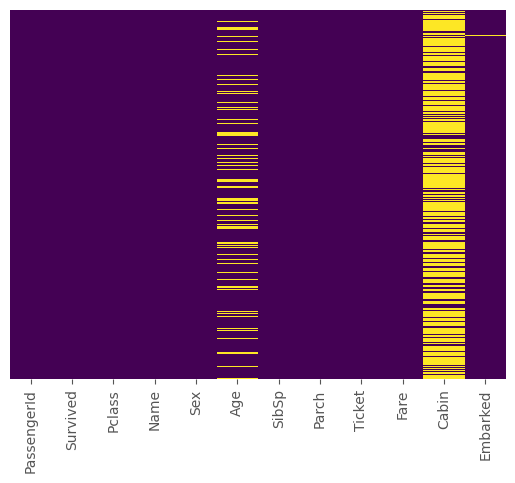

In [12]:
# Draw heatmap of missing values
# Draw heatmap of missing values
plt = ('Heatmap of missing values')

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Check missing values in Train Data
plt =('Missing Values in Train Data')

# Calculate the percentage of missing values
missing_percentage = train.isnull().sum() / len(train) * 100

# Sort the missing values in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Print the missing values percentage
print(missing_percentage)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64


Inferences:

The 'Cabin' column has a significant number of missing values (687 out of 891).

The 'Age' column has 177 missing values.

The 'Embarked' column has 2 missing values

In [15]:
# Drop the deck column
train.drop('Cabin', axis=1, inplace=True)

Question: Why We drop Cabin column?

The "Cabin" column had more than 50% missing values, so I decided to drop it because it could potentially affect the accuracy

In [16]:
# Impute the age column with KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
train['Age'] = imputer.fit_transform(train[['Age']])
train['Age'] = train['Age'].astype(int)

Question: Why use KNN imputer instead of median?


We used the KNN imputer because it offers a more flexible approach.Moreover, there were a substantial number of missing values in the age column. If we had used the median for imputation, it could have potentially affected the accuracy of our model."

In [17]:
# Impute the Embarked column with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [18]:
train.isnull().sum().sort_values(ascending=False)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Outliers Treatment

Now I dive to find outliers using IQR method for continous values

In [19]:
num_cols = ["Age","SibSp","Parch","Fare","PassengerId",]

In [20]:
Q1 = train[num_cols].quantile(0.25)
Q3 = train[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((train[num_cols] < (Q1 - 1.5 * IQR)) | (train[num_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Age             66
SibSp           46
Parch          213
Fare           116
PassengerId      0
dtype: int64

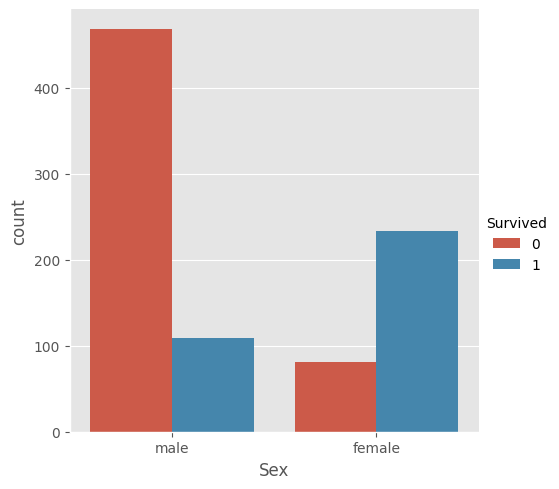

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train)

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

<Axes: xlabel='Survived', ylabel='Pclass'>

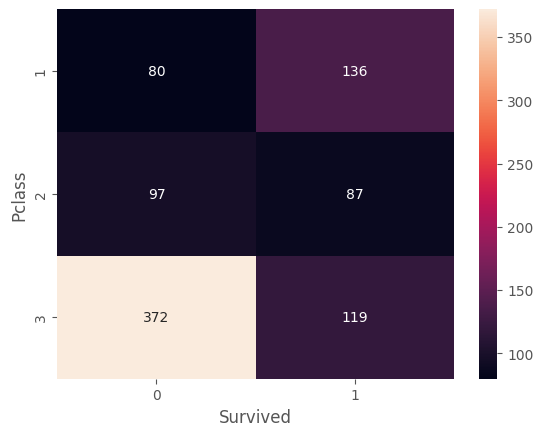

In [24]:
# Pclass (Ordinal Feature) vs Survived

# Group the dataset by Pclass and Survived and then unstack them
group = train.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")


It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

<Axes: xlabel='Sex', ylabel='Age'>

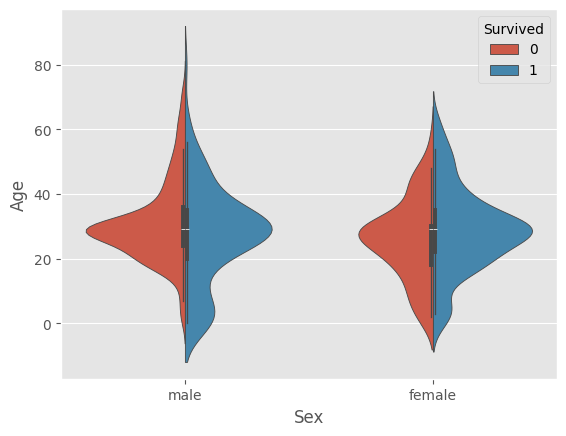

In [26]:
#Age (Continuous Feature) vs Survived
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train, split = True)


This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

Good for children.
High for women in the age range 20-50.
Less for men as the age increases.
Since Age column is important, the missing values need to be filled, either by using the Name column(ascertaining age based on salutation – Mr, Mrs etc.) or by using a regressor.
After this step, another column – Age_Range (based on age column) can be created and the data can be analyzed again.

<Axes: xlabel='Fare_Range', ylabel='Survived'>

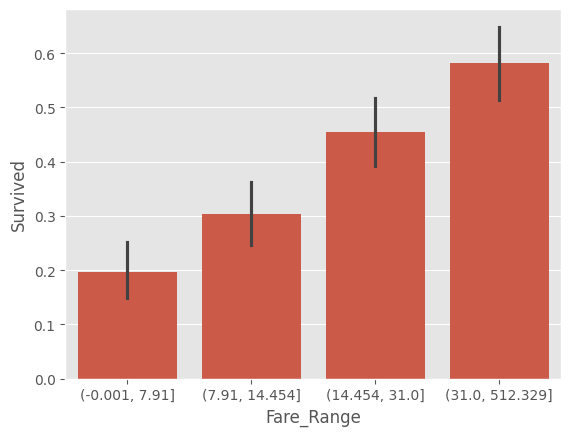

In [32]:
#Bar Plot for Fare (Continuous Feature)
# Divide Fare into 4 bins
train['Fare_Range'] = pd.qcut(train['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = train)


Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

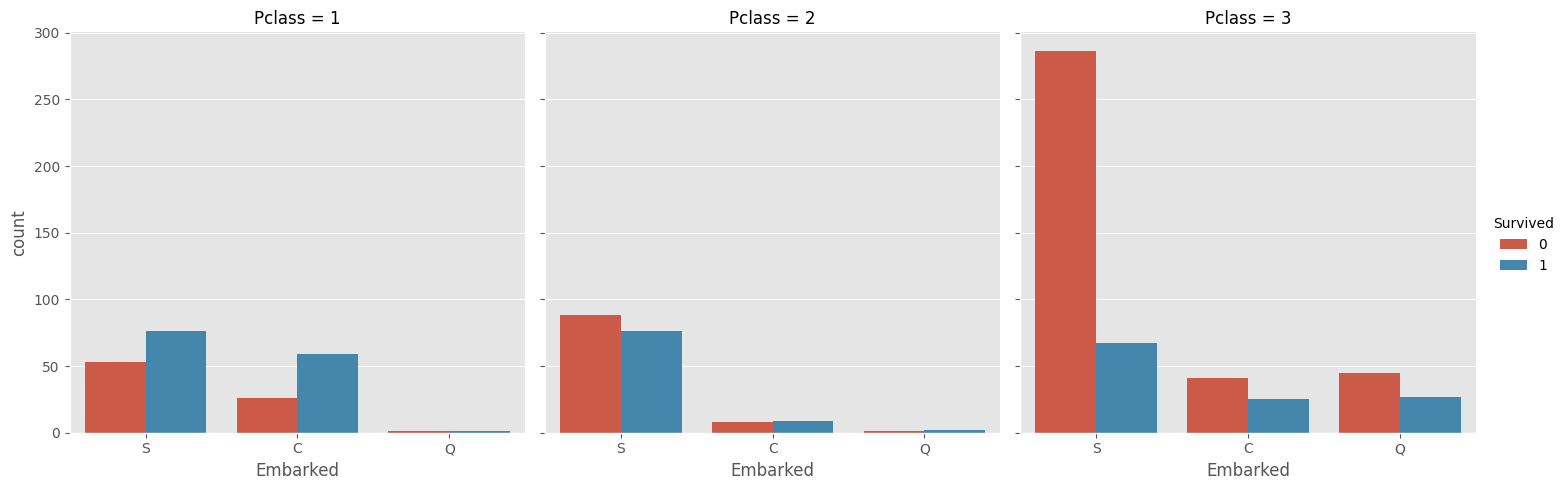

In [34]:
# Categorical Count Plots for Embarked Feature
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train)


Some notable observations are:

Majority of the passengers boarded from S. So, the missing values can be filled with S.
Majority of class 3 passengers boarded from Q.
S looks lucky for class 1 and 2 passengers compared to class 3.

Conclusion :  

The columns that can be dropped are:

>>PassengerId, Name, Ticket, Cabin: They are strings, cannot be >>categorized and don’t contribute much to the outcome.

>>Age, Fare: Instead, the respective range columns are retained.

The titanic data can be analyzed using many more graph techniques and also more column correlations, than, as described